In [1]:
!pip install fuzzy-c-means

  Obtaining dependency information for pydantic<2.0.0,>=1.9.0 from https://files.pythonhosted.org/packages/9c/2b/20029a5c58943c0dd19bbf1fda77e820101b63a26237b060217821a3daa3/pydantic-1.10.13-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/150.9 kB ? eta -:--:--
     ------- ------------------------------- 30.7/150.9 kB 1.3 MB/s eta 0:00:01
     ------------------------------ ------- 122.9/150.9 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 150.9/150.9 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.2/2.1 MB 4.8 MB/s eta 0:00:01
   ------- -------------------------------- 0.4/2.1 MB 4.0 MB/s eta 0:00:01
   ----------- ---------------------------- 0.6/2.1 MB 6.1 MB/s eta 0:00:01
   --------------- ------------------------ 0.8/2.1 MB 4.8 MB/s eta 0:00:01
   ------------------ --------------------- 1.0/2.1 MB 4.7 MB/s eta 0:00:01
   ---------

In [2]:
%matplotlib inline
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

Buat lah data yang sama untuk k-means++ dan fuzzy c-means dan bandingkan hasil silhoutte nya

In [14]:
n_samples = 100000

X = np.concatenate((
    np.random.normal((-20, -10), size=(n_samples, 2)),
    np.random.normal((10, 20), size=(n_samples, 2))
))

In [13]:
X

array([[ 0.86435505, -3.78075782],
       [-5.82426233, -7.36054411],
       [ 7.94859896, -6.45174828],
       ...,
       [ 1.66447275, -1.59117534],
       [-5.53715073, -6.72668213],
       [ 0.18146287, -2.09546025]])

In [9]:
from sklearn.datasets import make_blobs

In [19]:
n_samples = 100000
n_components = 5

X, y_true = make_blobs(n_samples=n_samples,
                       centers=n_components,
                       cluster_std=0.60,
                       random_state=1)
X = X[:, ::-1]

In [12]:
np.shape(X)

(100000, 2)

In [24]:
fcm = FCM(n_clusters=2)
fcm.fit(X)

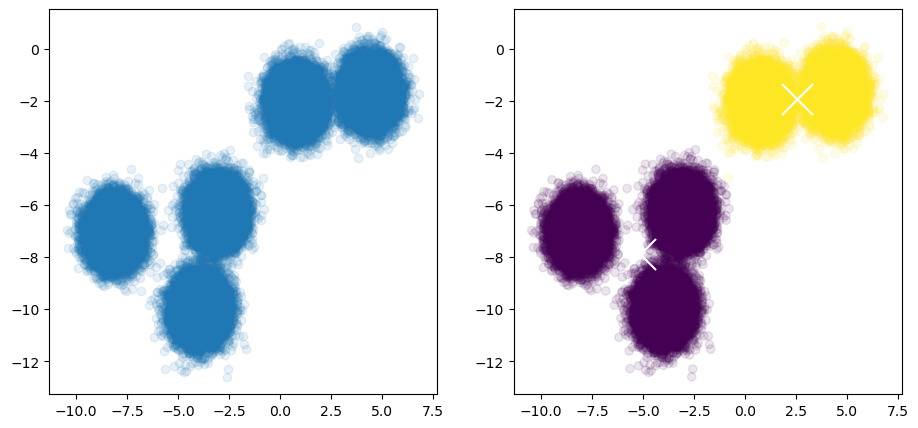

In [25]:
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X) #ini labelnya

f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.1)
axes[1].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.1)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="x", s=500, c='w')
plt.savefig('hasil.jpg')
plt.show()